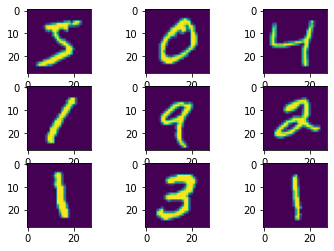

In [9]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img,img_to_array
import numpy as np
from keras.models import load_model
from tensorflow.keras.optimizers import SGD,Adam
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten
from keras.utils import np_utils
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
import matplotlib.pyplot as plt
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(x_train[i])
plt.show()

In [10]:
x_re=x_test
y_re=y_test
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test /= 255

In [11]:
y_train = np_utils.to_categorical(y_train,10)
y_test = np_utils.to_categorical(y_test,10)

In [12]:
#tạo lớp ẩn
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same', input_shape=(28,28,1)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2))) #tich chap 32 lan, (bo 3x3), ham truyen relu

In [13]:
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2,2)))

In [14]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [15]:
opt = SGD(lr=0.01,momentum=0.9)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [16]:
history = model.fit(x_train,y_train,batch_size=128,epochs=50,verbose=1,validation_data=(x_test,y_test))

Epoch 1/50
469/469 [==============================] - 229s 487ms/step - loss: 0.1480 - accuracy: 0.9560 - val_loss: 0.0451 - val_accuracy: 0.9855
Epoch 2/50
469/469 [==============================] - 227s 484ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0269 - val_accuracy: 0.9912
Epoch 3/50
469/469 [==============================] - 229s 489ms/step - loss: 0.0254 - accuracy: 0.9918 - val_loss: 0.0287 - val_accuracy: 0.9901
Epoch 4/50
469/469 [==============================] - 227s 483ms/step - loss: 0.0194 - accuracy: 0.9940 - val_loss: 0.0295 - val_accuracy: 0.9900
Epoch 5/50
469/469 [==============================] - 226s 481ms/step - loss: 0.0140 - accuracy: 0.9957 - val_loss: 0.0242 - val_accuracy: 0.9921
Epoch 6/50
469/469 [==============================] - 226s 483ms/step - loss: 0.0113 - accuracy: 0.9964 - val_loss: 0.0248 - val_accuracy: 0.9925
Epoch 7/50
469/469 [==============================] - 227s 483ms/step - loss: 0.0092 - accuracy: 0.9970 - val_loss: 0.0371 -

313/313 [==============================] - 12s 39ms/step - loss: 0.0333 - accuracy: 0.9947
Test loss= 0.03328932449221611
Test accuracy= 0.994700014591217


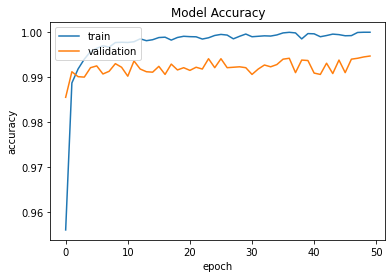

In [17]:
score=model.evaluate(x_test,y_test,verbose=1)
print('Test loss=',score[0])
print('Test accuracy=',score[1])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')

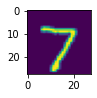

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


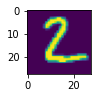

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


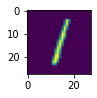

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


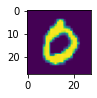

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


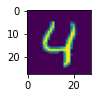

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


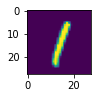

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


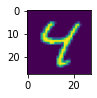

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


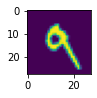

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


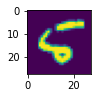

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [18]:
y_pred=model.predict(x_test)
for i in range(9):
  plt.subplot(330+i+1) #330: 3 hang 3 cot, stt di tu trai sang phai tren duoi,i=0 thi 331 phan tu tuong tac la so 1
  plt.imshow(x_re[i])
  plt.show()
  print(np.round(y_pred[i]))

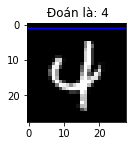

In [38]:
plt.subplot(212)
plt.title('Val Accuracy')
plt.plot(history.history['val_accuracy'], color='blue',label='train')
Label = ['0', '1', '2', '3',
'4', '5', '6', '7', '8', '9']
test = 1300
plt.title(" Đoán là: " +
str(Label[np.argmax(model.predict(x_re[test].reshape((-1,x_train.shape[1],x_train.shape[2],1))))]))
y_test[test]
plt.imshow(x_re[test],
cmap=plt.get_cmap('gray'))

Text(0.5, 1.0, ' Đoán là: 5')

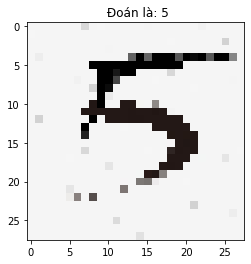

In [51]:
url = '/content/5.jpg'
img=load_img(url,target_size=(28,28))
plt.imshow(img)
img=img_to_array(img)
img=img.astype('float32')
img=img/255
plt.title(" Đoán là: " +
str(Label[np.argmax(model.predict(img.reshape((-1,x_train.shape[1],x_train.shape[2],1))))]))